# Inspect Pascal VOC (2007&2012) Detection torchvision Dataset

In [17]:
from pprint import pprint, pformat
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data.dataloader as dataloader
import torchvision
from torchvision import transforms
from torchvision.transforms import v2
from torchvision.utils import draw_bounding_boxes
from torch.utils.data import ConcatDataset
from torchvision import tv_tensors
from torchvision.datasets import wrap_dataset_for_transforms_v2
from torchvision.tv_tensors._dataset_wrapper import VOC_DETECTION_CATEGORIES, VOC_DETECTION_CATEGORY_TO_IDX
from torchvision.ops import box_convert
from torchvision import tv_tensors
# palette is a list of color tuples, which is used for visualization.
palette =  [(106, 0, 228), (119, 11, 32), (165, 42, 42), (0, 0, 192),
            (197, 226, 255), (0, 60, 100), (0, 0, 142), (255, 77, 255),
            (153, 69, 1), (120, 166, 157), (0, 182, 199),
            (0, 226, 252), (182, 182, 255), (0, 0, 230), (220, 20, 60),
            (163, 255, 0), (0, 82, 0), (3, 95, 161), (0, 80, 100),
            (183, 130, 88)]

## Check sample data

In [18]:
dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))
dataset_2007_val = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='val', download=False,
                                                     transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))
dataset_2007_trainval = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='trainval', download=False,
                                                     transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))
dataset_2007_test = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='test', download=False,
                                                      transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))
dataset_2012_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2012', image_set='train', download=False,
                                                       transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))
dataset_2012_val = torchvision.datasets.VOCDetection(root='../data/voc', year='2012', image_set='val', download=False,
                                                     transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))
dataset_2012_trainval = torchvision.datasets.VOCDetection(root='../data/voc', year='2012', image_set='trainval', download=False,
                                                       transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))

Len of dataset_2007_train: 2501
Len of dataset_2007_val: 2510
Len of dataset_2007_trainval: 5011
Len of dataset_2007_test: 4952
Len of dataset_2012_train: 5717
Len of dataset_2012_val: 5823
Len of dataset_2012_trainval: 11540
Sample:
Image: Image([[[ 59,  17,   0,  ..., 208, 218, 182],
        [ 84,  16,   1,  ..., 255, 253, 231],
        [113,  16,   0,  ..., 233, 229, 223],
        ...,
        [ 90, 106, 136,  ..., 199, 199, 202],
        [113, 120, 134,  ..., 196, 195, 198],
        [114, 123, 112,  ..., 199, 201, 203]],

       [[112,  57,   6,  ..., 197, 206, 173],
        [132,  53,  13,  ..., 246, 243, 223],
        [154,  48,   6,  ..., 220, 220, 216],
        ...,
        [ 76,  90, 117,  ..., 179, 182, 185],
        [ 99, 104, 115,  ..., 176, 178, 183],
        [100, 107,  93,  ..., 182, 184, 188]],

       [[252, 179,  95,  ..., 179, 190, 156],
        [255, 168,  97,  ..., 232, 231, 210],
        [255, 151,  82,  ..., 214, 215, 210],
        ...,
        [ 63,  77, 103,  .

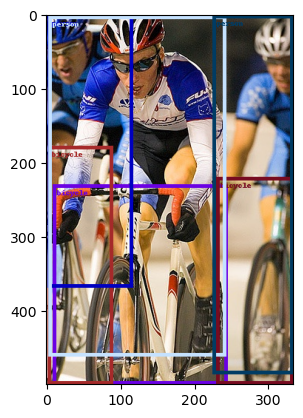

In [19]:
print(f"Len of dataset_2007_train: {len(dataset_2007_train)}")
print(f"Len of dataset_2007_val: {len(dataset_2007_val)}")
print(f"Len of dataset_2007_trainval: {len(dataset_2007_trainval)}")
print(f"Len of dataset_2007_test: {len(dataset_2007_test)}")
print(f"Len of dataset_2012_train: {len(dataset_2012_train)}")
print(f"Len of dataset_2012_val: {len(dataset_2012_val)}")
print(f"Len of dataset_2012_trainval: {len(dataset_2012_trainval)}")

print("Sample:")
x, y = dataset_2007_train[2]
print(f"Image: {x} ({type(x)=}), hw={x.shape}")  # Before transforms, it's a tv_tensors.Image with non-fixed size
print(f"Label: {pformat(y)} ({type(y)=})")
print(f"Bounding boxes:")
boxes = []
labels = []
for box in y['annotation']['object']:
    boxes.append([int(box['bndbox']['xmin']), int(box['bndbox']['ymin']), int(box['bndbox']['xmax']), int(box['bndbox']['ymax'])])
    labels.append(box['name'])
    print(f"  {box['name']}: {box['bndbox']}")
img = draw_bounding_boxes(x, boxes=torch.tensor(boxes), labels=labels, colors=[palette[i%len(palette)] for i in range(len(boxes))], width=5)
plt.imshow(img.permute(1, 2, 0))

In [20]:
dataset_train = ConcatDataset([dataset_2007_train, dataset_2012_train, dataset_2007_val, dataset_2012_val])
dataset_test = dataset_2007_test

print(f"Len of dataset_train: {len(dataset_train)}")
print(f"Len of dataset_test: {len(dataset_test)}")

Len of dataset_train: 16551
Len of dataset_test: 4952


## Original transform & target_transform

In [21]:
dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]),
                                                       target_transform=lambda y: [[box['name'], torch.tensor([int(box['bndbox']['xmin']),
                                                                                                               int(box['bndbox']['ymin']),
                                                                                                               int(box['bndbox']['xmax']),
                                                                                                               int(box['bndbox']['ymax'])])]
                                                                                   for box in y['annotation']['object']])
x, y = dataset_2007_train[2]
print(f"Image: {x} ({type(x)=}), hw={x.shape}")
print(f"Label: {pformat(y)} ({type(y)=})")

Image: Image([[[ 59,  17,   0,  ..., 208, 218, 182],
        [ 84,  16,   1,  ..., 255, 253, 231],
        [113,  16,   0,  ..., 233, 229, 223],
        ...,
        [ 90, 106, 136,  ..., 199, 199, 202],
        [113, 120, 134,  ..., 196, 195, 198],
        [114, 123, 112,  ..., 199, 201, 203]],

       [[112,  57,   6,  ..., 197, 206, 173],
        [132,  53,  13,  ..., 246, 243, 223],
        [154,  48,   6,  ..., 220, 220, 216],
        ...,
        [ 76,  90, 117,  ..., 179, 182, 185],
        [ 99, 104, 115,  ..., 176, 178, 183],
        [100, 107,  93,  ..., 182, 184, 188]],

       [[252, 179,  95,  ..., 179, 190, 156],
        [255, 168,  97,  ..., 232, 231, 210],
        [255, 151,  82,  ..., 214, 215, 210],
        ...,
        [ 63,  77, 103,  ..., 152, 154, 157],
        [ 88,  91, 101,  ..., 149, 148, 152],
        [ 89,  94,  79,  ..., 154, 154, 157]]], dtype=torch.uint8, ) (type(x)=<class 'torchvision.tv_tensors._image.Image'>), hw=torch.Size([3, 500, 334])
Label: [['bic

## Wrap by v2

In [22]:
dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False)
print("Without v2 wrap:")
x, y = dataset_2007_train[2]
print(x, y, sep='\n')
print(y.keys())

dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train)
print("\nWith v2 wrap & target_keys=None:")
x, y = dataset_2007_train_v2[2]
print(x, pformat(y), sep='\n')
print(y.keys())
print(f"labels2categories: {[VOC_DETECTION_CATEGORIES[idx] for idx in y['labels']]}")

dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys='all')
print("\nWith v2 wrap & target_keys='all':")
x, y = dataset_2007_train_v2[2]
print(x, y, sep='\n')
print(y.keys())

Without v2 wrap:
<PIL.Image.Image image mode=RGB size=334x500 at 0x7AB5842B8820>
{'annotation': {'folder': 'VOC2007', 'filename': '000023.jpg', 'source': {'database': 'The VOC2007 Database', 'annotation': 'PASCAL VOC2007', 'image': 'flickr', 'flickrid': '220208496'}, 'owner': {'flickrid': 'thevelodrome.com', 'name': '?'}, 'size': {'width': '334', 'height': '500', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'bicycle', 'pose': 'Unspecified', 'truncated': '1', 'difficult': '0', 'bndbox': {'xmin': '9', 'ymin': '230', 'xmax': '245', 'ymax': '500'}}, {'name': 'bicycle', 'pose': 'Frontal', 'truncated': '1', 'difficult': '0', 'bndbox': {'xmin': '230', 'ymin': '220', 'xmax': '334', 'ymax': '500'}}, {'name': 'bicycle', 'pose': 'Unspecified', 'truncated': '1', 'difficult': '1', 'bndbox': {'xmin': '2', 'ymin': '178', 'xmax': '90', 'ymax': '500'}}, {'name': 'person', 'pose': 'Unspecified', 'truncated': '1', 'difficult': '0', 'bndbox': {'xmin': '2', 'ymin': '1', 'xmax': '117', 'ymax': '369'

## v2 transforms + wrap by v2

Try 1:
x=Image([[[0.4824, 0.4824, 0.4824,  ..., 0.4824, 0.4824, 0.4824],
        [0.4824, 0.4824, 0.4824,  ..., 0.4824, 0.4824, 0.4824],
        [0.4824, 0.4824, 0.4824,  ..., 0.4824, 0.4824, 0.4824],
        ...,
        [0.4824, 0.4824, 0.4824,  ..., 0.7922, 0.7882, 0.8078],
        [0.4824, 0.4824, 0.4824,  ..., 0.7961, 0.7882, 0.8157],
        [0.4824, 0.4824, 0.4824,  ..., 0.8000, 0.8000, 0.8039]],

       [[0.4588, 0.4588, 0.4588,  ..., 0.4588, 0.4588, 0.4588],
        [0.4588, 0.4588, 0.4588,  ..., 0.4588, 0.4588, 0.4588],
        [0.4588, 0.4588, 0.4588,  ..., 0.4588, 0.4588, 0.4588],
        ...,
        [0.4588, 0.4588, 0.4588,  ..., 0.7373, 0.7333, 0.7569],
        [0.4588, 0.4588, 0.4588,  ..., 0.7412, 0.7333, 0.7647],
        [0.4588, 0.4588, 0.4588,  ..., 0.7451, 0.7451, 0.7529]],

       [[0.4078, 0.4078, 0.4078,  ..., 0.4078, 0.4078, 0.4078],
        [0.4078, 0.4078, 0.4078,  ..., 0.4078, 0.4078, 0.4078],
        [0.4078, 0.4078, 0.4078,  ..., 0.4078, 0.4078, 0.4078],
 

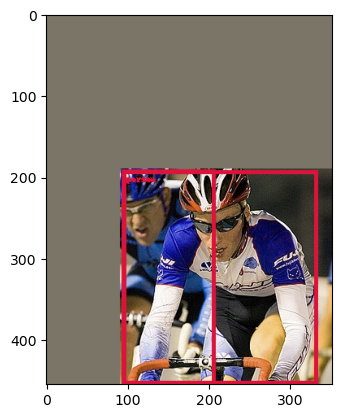

Try 2:
x=Image([[[0.4824, 0.4824, 0.4824,  ..., 0.4824, 0.4824, 0.4824],
        [0.4824, 0.4824, 0.4824,  ..., 0.4824, 0.4824, 0.4824],
        [0.4824, 0.4824, 0.4824,  ..., 0.4824, 0.4824, 0.4824],
        ...,
        [0.4824, 0.4824, 0.4824,  ..., 0.4824, 0.4824, 0.4824],
        [0.4824, 0.4824, 0.4824,  ..., 0.4824, 0.4824, 0.4824],
        [0.4824, 0.4824, 0.4824,  ..., 0.4824, 0.4824, 0.4824]],

       [[0.4588, 0.4588, 0.4588,  ..., 0.4588, 0.4588, 0.4588],
        [0.4588, 0.4588, 0.4588,  ..., 0.4588, 0.4588, 0.4588],
        [0.4588, 0.4588, 0.4588,  ..., 0.4588, 0.4588, 0.4588],
        ...,
        [0.4588, 0.4588, 0.4588,  ..., 0.4588, 0.4588, 0.4588],
        [0.4588, 0.4588, 0.4588,  ..., 0.4588, 0.4588, 0.4588],
        [0.4588, 0.4588, 0.4588,  ..., 0.4588, 0.4588, 0.4588]],

       [[0.4078, 0.4078, 0.4078,  ..., 0.4078, 0.4078, 0.4078],
        [0.4078, 0.4078, 0.4078,  ..., 0.4078, 0.4078, 0.4078],
        [0.4078, 0.4078, 0.4078,  ..., 0.4078, 0.4078, 0.4078],
 

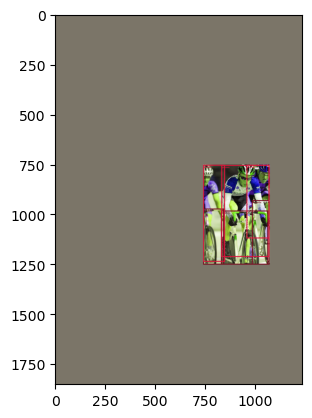

In [23]:
transforms = v2.Compose(
    [
        v2.ToImage(),
        v2.RandomPhotometricDistort(),
        v2.RandomZoomOut(fill={tv_tensors.Image: (123.0, 117.0, 104.0), "others": 0}),
        v2.RandomIoUCrop(),
        v2.RandomHorizontalFlip(),
        v2.SanitizeBoundingBoxes(),
        v2.ToDtype(torch.float32, scale=True),
    ]
)
dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transforms=transforms)
dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys=['boxes', 'labels'])

for i in range(2):
    print(f"Try {i+1}:")
    x, y = dataset_2007_train_v2[2]
    print(f"{x=}\n{y=}")
    labels = [VOC_DETECTION_CATEGORIES[idx] for idx in y['labels']]
    img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True), labels=labels, boxes=y['boxes'], colors=[palette[idx-1] for idx in y['labels']], width=5)
    plt.imshow(img.permute(1, 2, 0).numpy())
    plt.show()

## Custom image transform - letter box

x.shape=torch.Size([3, 416, 416])
y={'boxes': BoundingBoxes([[ 76, 191, 272, 416],
               [260, 183, 347, 416],
               [ 70, 148, 143, 416],
               [ 70,   0, 166, 307],
               [ 71,   1, 271, 384],
               [256,   0, 347, 404]], format=BoundingBoxFormat.XYXY, canvas_size=(416, 416)), 'labels': tensor([ 2,  2,  2, 15, 15, 15])}


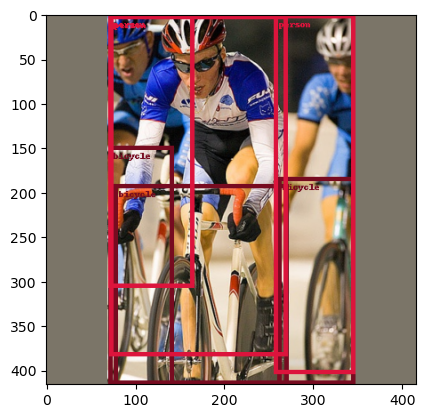

In [24]:
img_h = 416
img_w = 416
letterbox = True
fill = (123.0, 117.0, 104.0)

from typing import Any, Callable, cast, Dict, List, Literal, Optional, Sequence, Tuple, Type, Union
from torchvision.transforms.v2 import functional as F, InterpolationMode
from torchvision.transforms.v2.functional._utils import _FillType
from torch.utils._pytree import tree_flatten, tree_unflatten
class Resize(v2.Resize):
    def __init__(
            self,
            letterbox: bool,
            fill:  Union[_FillType, Dict[Union[Type, str], _FillType]] = 0,
            **kwargs,  # params for v2.Resize
        ) -> None:
        super().__init__(**kwargs)
        self.size = self.size + self.size if len(self.size) == 1 else self.size
        self.letterbox = letterbox
        self.fill = fill
        self._fill = v2._utils._setup_fill_arg(fill)
        self.padding_mode = 'constant'  # only support constant padding mode for bounding boxes

    def _get_params(self, flat_inputs: List[Any]) -> Dict[str, Any]:
        orig_h, orig_w = v2._utils.query_size(flat_inputs)
        new_h, new_w = self.size
        if not self.letterbox:
            return dict(size=(new_h, new_w))
        else:  # do letterbox
            r_h, r_w = new_h / orig_h, new_w / orig_w
            r = min(r_h, r_w)
            new_unpad_h, new_unpad_w = round(orig_h * r), round(orig_w * r)
            pad_left = pad_right = pad_top = pad_bottom = 0
            if r_w < r_h:
                diff = new_h - new_unpad_h
                pad_top += (diff // 2)
                pad_bottom += (diff - pad_top)
            else:  # r_h <= r_w:
                diff = new_w - new_unpad_w
                pad_left += (diff // 2)
                pad_right += (diff - pad_left)
            padding = [pad_left, pad_top, pad_right, pad_bottom]
            return dict(size=(new_unpad_h, new_unpad_w), padding=padding)

    def _transform(self, inpt: Any, params: Dict[str, Any]) -> Any:
        inpt = self._call_kernel(F.resize, inpt, size=params['size'],
                                 interpolation=self.interpolation, antialias=self.antialias)
        if self.letterbox:
            fill = v2._utils._get_fill(self._fill, type(inpt))
            inpt = self._call_kernel(F.pad, inpt, padding=params["padding"], fill=fill, padding_mode=self.padding_mode)
        return inpt

transforms = v2.Compose(
    [
        v2.ToImage(),
        v2.RandomHorizontalFlip(),
        Resize(size=(img_h, img_w), letterbox=letterbox, fill={tv_tensors.Image: fill, "others": 0}, antialias=True),
        v2.SanitizeBoundingBoxes(),
        v2.ToDtype(torch.float32, scale=True),
    ]
)
dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transforms=transforms)
dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys=['boxes', 'labels'])

x, y = dataset_2007_train_v2[2]
print(f"{x.shape=}\n{y=}")
labels = [VOC_DETECTION_CATEGORIES[idx] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True), labels=labels, boxes=y['boxes'], colors=[palette[idx-1] for idx in y['labels']], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

## Custom target transform - label preprocess

x.shape=torch.Size([3, 333, 500])
y.shape=torch.Size([2, 6])
Transformed: y=tensor([[-1.0000,  8.0000,  0.6290,  0.4970,  0.7380,  0.9880],
        [-1.0000,  7.0000,  0.5890,  0.4715,  0.4260,  0.3363]])
Restored: y={'boxes': tensor([[130.,   1., 499., 330.],
        [188., 101., 401., 213.]]), 'labels': tensor([8, 7])}
y_supp={'boxes': BoundingBoxes([[130,   1, 499, 330],
               [188, 101, 401, 213]], format=BoundingBoxFormat.XYXY, canvas_size=(333, 500)), 'labels': tensor([8, 7])}


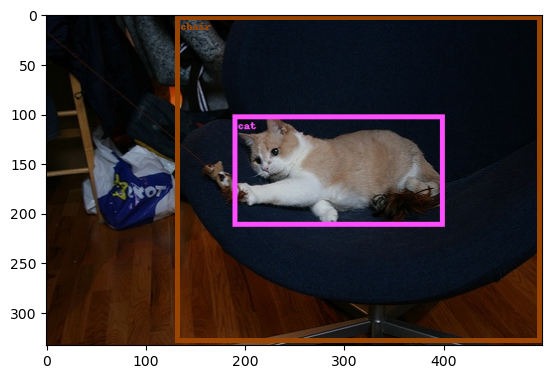

In [34]:
class Voc2Yolov3(nn.Module):
    """
    Returns:
        x (Tensor): size(3, img_h, img_w), RGB, 0~255
        y_yolov3 (Tensor): size(n_obj, 6), torch.float32
            y_yolov3[i, 0] is the idx of the image in the batch, 0~batch_size-1, init with -1, assigned in collate_fn
            y_yolov3[i, 1] is the class index for the i-th object box, 0.0~float(n_class-1), no background class
            y_yolov3[i, 2:6] is the box coordinates for the i-th object box, normalized by img wh, CXCYWH format
        y_voc['boxes'] (tv_tensors.BoundingBoxes): size(n_obj, 4), in pixels, XYXY format
        y_voc['labels'] (Tensor): size(n_obj,), torch.int64, 1~n_class, no background class
    """
    def forward(self, x, y_voc):
        img_h, img_w = x.shape[-2:]
        cxcywh = box_convert(y_voc['boxes'], in_fmt='xyxy', out_fmt='cxcywh')
        cxcywhn = cxcywh / torch.tensor([img_w, img_h, img_w, img_h])
        n_obj = cxcywh.shape[0]
        y_voc['labels'] -= 1  # - 1 to remove background class
        y_yolov3 = torch.cat((torch.full((n_obj, 1), -1), y_voc['labels'].unsqueeze(1), cxcywhn), dim=1).to(torch.float32)
        return x, y_yolov3, y_voc

    @classmethod
    def inv_target_transform(self, x, y_yolov3):
        img_h, img_w = x.shape[-2:]
        cxcywh = y_yolov3[:, 2:6] * torch.tensor([img_w, img_h, img_w, img_h])
        xyxy = box_convert(cxcywh, in_fmt='cxcywh', out_fmt='xyxy')
        labels = y_yolov3[:, 1].to(torch.int64)
        y_voc = {'boxes': xyxy, 'labels': labels}
        return y_voc


transforms = v2.Compose([
    v2.ToImage(),
    v2.RandomHorizontalFlip(),
    v2.SanitizeBoundingBoxes(),
    v2.ToDtype(torch.float32, scale=True),
    Voc2Yolov3(),
])

dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transforms=transforms)
dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys=['boxes', 'labels'])

x, y, y_supp = dataset_2007_train_v2[10]
print(f"{x.shape=}\n{y.shape=}")
print(f"Transformed: {y=}")
y = Voc2Yolov3.inv_target_transform(x, y)
print(f"Restored: {y=}")
print(f"{y_supp=}")
labels = [VOC_DETECTION_CATEGORIES[idx+1] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx] for idx in y['labels']], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

## Dataloader & collate_fn

torch.Size([3, 416, 416])
torch.Size([3, 416, 416])
torch.Size([3, 416, 416])
X.shape=torch.Size([4, 3, 416, 416])
Y.shape=torch.Size([16, 6])
Y_SUPP=({'boxes': BoundingBoxes([[146, 121, 249, 334],
               [262, 137, 361, 343]], format=BoundingBoxFormat.XYXY, canvas_size=(416, 416)), 'labels': tensor([8, 8])}, {'boxes': BoundingBoxes([[268, 140, 337, 246],
               [ 50, 207, 104, 236],
               [ 79, 205, 116, 229],
               [150, 300, 217, 347],
               [215, 317, 291, 347]], format=BoundingBoxFormat.XYXY, canvas_size=(416, 416)), 'labels': tensor([18,  6,  6, 15, 15])}, {'boxes': BoundingBoxes([[213, 116, 400, 346],
               [  0,  74, 364, 346]], format=BoundingBoxFormat.XYXY, canvas_size=(416, 416)), 'labels': tensor([14, 14])}, {'boxes': BoundingBoxes([[116, 215, 203, 235],
               [353, 234, 374, 249],
               [307, 235, 331, 252],
               [259, 246, 269, 256],
               [257, 280, 268, 301],
               [132, 28

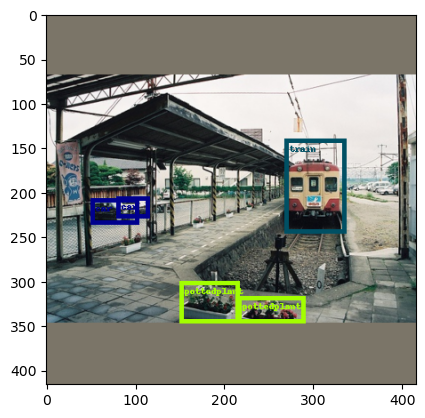

In [41]:
dataset_2007_train = torchvision.datasets.VOCDetection(
    root='../data/voc', year='2007', image_set='train', download=False,
    transforms=v2.Compose([
        v2.ToImage(),
        v2.RandomHorizontalFlip(),
        Resize(size=(img_h, img_w), letterbox=letterbox, fill={tv_tensors.Image: fill, "others": 0}, antialias=True),
        v2.SanitizeBoundingBoxes(),
        v2.ToDtype(torch.float32, scale=True),
        Voc2Yolov3(),
    ])
)
dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys=['boxes', 'labels'])
print(dataset_2007_train_v2[10][0].shape)
print(dataset_2007_train_v2[11][0].shape)
print(dataset_2007_train_v2[12][0].shape)


def collate_fn(batch):
    xs, ys, y_supps = zip(*batch)
    for idx_img, y in enumerate(ys):
        y[:, 0] = idx_img
    return torch.stack(xs, dim=0), torch.cat(ys, dim=0), y_supps

dataloader_2007_train = dataloader.DataLoader(dataset_2007_train_v2, batch_size=4, shuffle=True, num_workers=0,
                                              collate_fn=collate_fn)
X, Y, Y_SUPP = next(iter(dataloader_2007_train))
print(f"{X.shape=}\n{Y.shape=}")
print(f"{Y_SUPP=}")

idx_img = 1
x, y, y_supp = X[idx_img], Y[Y[:, 0]==idx_img], Y_SUPP[idx_img]
print(f"{y=}")
print(f"{y_supp=}")
y = Voc2Yolov3.inv_target_transform(x, y)
labels = [VOC_DETECTION_CATEGORIES[idx+1] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx] for idx in y['labels']], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

In [42]:
%%timeit
X, Y, Y_SUPP = next(iter(dataloader_2007_train))

70.7 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## ConcatDataset + wrap_dataset_for_transforms_v2

X.shape=torch.Size([4, 3, 416, 416])
Y.shape=torch.Size([10, 6])
Y_SUPP=({'boxes': BoundingBoxes([[212, 121, 319, 361],
               [101, 142, 213, 339],
               [187,  22, 327, 307],
               [ 84,  30, 222, 312]], format=BoundingBoxFormat.XYXY, canvas_size=(416, 416)), 'labels': tensor([ 1,  1, 14, 14])}, {'boxes': BoundingBoxes([[ 41, 179, 382, 271],
               [  0, 116, 413, 346]], format=BoundingBoxFormat.XYXY, canvas_size=(416, 416)), 'labels': tensor([11, 17])}, {'boxes': BoundingBoxes([[ 26, 133, 277, 364],
               [215, 101, 416, 364],
               [ 29, 261,  68, 298]], format=BoundingBoxFormat.XYXY, canvas_size=(416, 416)), 'labels': tensor([14, 14, 14])}, {'boxes': BoundingBoxes([[  4,  52, 416, 323]], format=BoundingBoxFormat.XYXY, canvas_size=(416, 416)), 'labels': tensor([7])})
x.shape=torch.Size([3, 416, 416])
y.shape=torch.Size([2, 6])
y={'boxes': tensor([[ 41.0000, 179.0000, 382.0000, 271.0000],
        [  0.0000, 116.0000, 413.0000, 346.

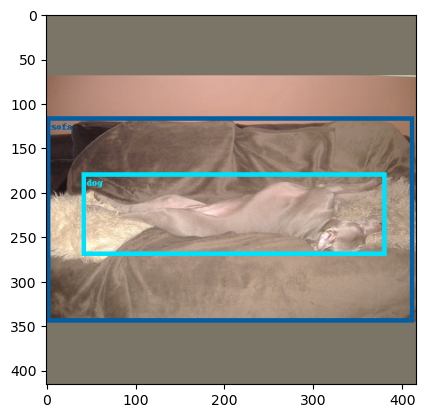

In [45]:
transforms_val = v2.Compose([
    v2.ToImage(),
    v2.RandomHorizontalFlip(),
    Resize(size=(img_h, img_w), letterbox=letterbox, fill={tv_tensors.Image: fill, "others": 0}, antialias=True),
    v2.SanitizeBoundingBoxes(),
    v2.ToDtype(torch.float32, scale=True),
    Voc2Yolov3(),
])

dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transforms=transforms_val)
dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys=['boxes', 'labels'])
dataset_2007_val = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='val', download=False,
                                                     transforms=transforms_val)
dataset_2007_val_v2 = wrap_dataset_for_transforms_v2(dataset_2007_val, target_keys=['boxes', 'labels'])
dataset_2007_trainval_cat = ConcatDataset([dataset_2007_train_v2, dataset_2007_val_v2])
datasetloader_2007_trainval_cat = dataloader.DataLoader(dataset_2007_trainval_cat, batch_size=4, shuffle=True, num_workers=0,
                                                        collate_fn=collate_fn)
X, Y, Y_SUPP = next(iter(datasetloader_2007_trainval_cat))
print(f"{X.shape=}\n{Y.shape=}")
print(f"{Y_SUPP=}")

idx_img = 1
x, y, y_supp = X[idx_img], Y[Y[:, 0]==idx_img], Y_SUPP[idx_img]
print(f"{x.shape=}\n{y.shape=}")
y = Voc2Yolov3.inv_target_transform(x, y)
print(f"{y=}")
print(f"{y_supp=}")
labels = [VOC_DETECTION_CATEGORIES[idx+1] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx] for idx in y['labels']], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

## Inspect transforms

### Dummy train transforms

x.shape=torch.Size([3, 416, 416])
y.shape=torch.Size([2, 6])
y={'boxes': tensor([[  0.,  69., 307., 343.],
        [ 82., 153., 259., 246.]]), 'labels': tensor([8, 7])}
y_supp={'boxes': BoundingBoxes([[  0,  69, 307, 343],
               [ 82, 153, 259, 246]], format=BoundingBoxFormat.XYXY, canvas_size=(416, 416)), 'labels': tensor([8, 7])}


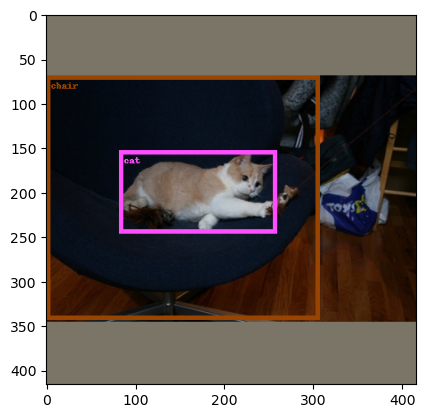

In [48]:
perspective = 0.0
crop_scale = 1.0
ratio_min = 1.0
ratio_max = 1.0
degrees = 0.0  # unit: deg
translate = 0.0
scale = 0.0
shear = 0.0  # unit: deg
brightness = 0.0
contrast = 0.0
saturation = 0.0
hue = 0.0
flip_p = 0.0
letterbox = True
imgs_mean = (0.0, 0.0, 0.0)
imgs_std = (1.0, 1.0, 1.0)
fill = (123.0, 117.0, 104.0)


transforms = v2.Compose([
    v2.ToImage(),
    v2.ColorJitter(brightness=brightness, contrast=contrast, saturation=saturation, hue=hue),
    v2.RandomIoUCrop(min_scale=crop_scale, max_scale=1.0, min_aspect_ratio=ratio_min, max_aspect_ratio=ratio_max),
    Resize(size=(img_h, img_w), letterbox=letterbox, fill={tv_tensors.Image: fill, "others": 0}, antialias=True),
    v2.RandomPerspective(distortion_scale=perspective, fill=fill),
    v2.RandomAffine(degrees=degrees, translate=(translate, translate), scale=(1 - scale, 1 + scale),
                    shear=(-shear, shear, -shear, shear), fill=fill, interpolation=InterpolationMode.BILINEAR),
    v2.RandomHorizontalFlip(p=flip_p),
    v2.SanitizeBoundingBoxes(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=imgs_mean, std=imgs_std),
    Voc2Yolov3(),
])

dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transforms=transforms)
dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys=['boxes', 'labels'])

x, y, y_supp = dataset_2007_train_v2[10]
print(f"{x.shape=}\n{y.shape=}")
y = Voc2Yolov3.inv_target_transform(x, y)
print(f"{y=}")
print(f"{y_supp=}")
labels = [VOC_DETECTION_CATEGORIES[idx+1] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx] for idx in y['labels']], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

### Blank transforms

x.shape=torch.Size([3, 416, 416])
y.shape=torch.Size([2, 6])
y={'boxes': tensor([[  0.,  69., 307., 343.],
        [ 82., 153., 259., 246.]]), 'labels': tensor([8, 7])}
y_supp={'boxes': BoundingBoxes([[  0,  69, 307, 343],
               [ 82, 153, 259, 246]], format=BoundingBoxFormat.XYXY, canvas_size=(416, 416)), 'labels': tensor([8, 7])}


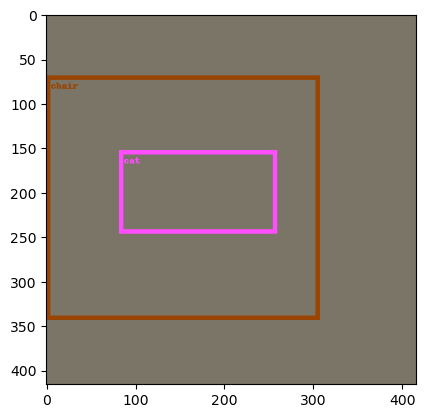

In [50]:
img_h = 416
img_w = 416
imgs_mean = (0.0, 0.0, 0.0)
imgs_std = (1.0, 1.0, 1.0)
fill = (123.0, 117.0, 104.0)

import PIL.Image
transforms = v2.Compose([
    v2.ToImage(),
    v2.Lambda(lambda inp: tv_tensors.wrap(torch.tensor(fill, dtype=inp.dtype, device=inp.device).view(3, 1, 1).expand(inp.shape), like=inp)
              if isinstance(inp, tv_tensors.Image) else inp),
    Resize(size=(img_h, img_w), letterbox=letterbox, fill={tv_tensors.Image: fill, "others": 0}, antialias=True),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=imgs_mean, std=imgs_std),
    Voc2Yolov3(),
])

dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transforms=transforms)
dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys=['boxes', 'labels'])

x, y, y_supp = dataset_2007_train_v2[10]
print(f"{x.shape=}\n{y.shape=}")
y = Voc2Yolov3.inv_target_transform(x, y)
print(f"{y=}")
print(f"{y_supp=}")
labels = [VOC_DETECTION_CATEGORIES[idx+1] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx] for idx in y['labels']], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()